In [354]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [276]:
data=pd.read_csv('/content/train_exit.csv')

In [277]:
#displays the first five rows from top
data.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


**Check the basic details of the dataset**

In [278]:
#no of rows and columns
data.shape

(13994, 30)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [280]:
#statistical analysis of data
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [281]:
#Displays the number of null values in each column
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [282]:
#Displays the column names
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [283]:
#To display the numerical and categorical columns in the dataset
num = data.median().index

<ipython-input-283-ba275608393c>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  num = data.median().index


In [284]:
num

Index(['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications', 'selection'],
      dtype='object')

In [285]:
cat =[i for i in data.columns if i not in num]

In [286]:
cat

['player_id',
 'name',
 'gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

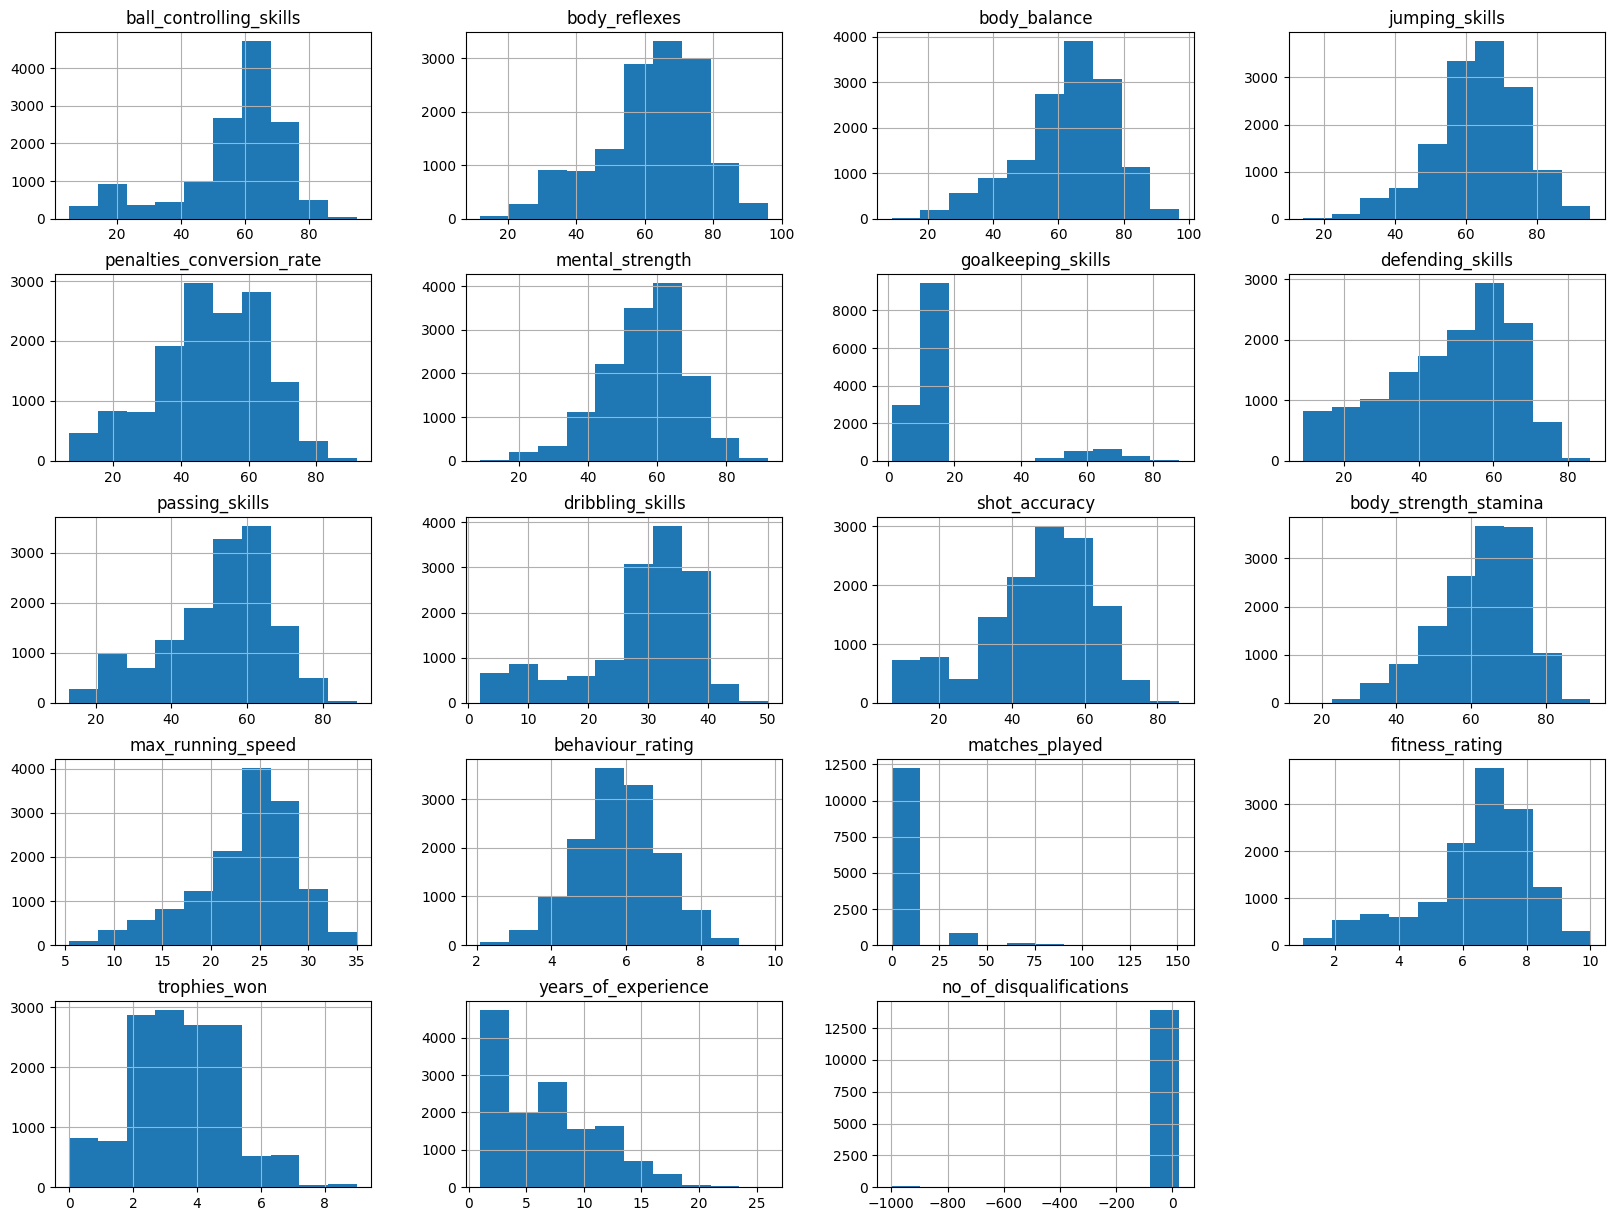

In [287]:
#Histograms provide a quick visual summary of the data's distribution.
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))
plt.show()

<ipython-input-288-e9ab9194e6c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


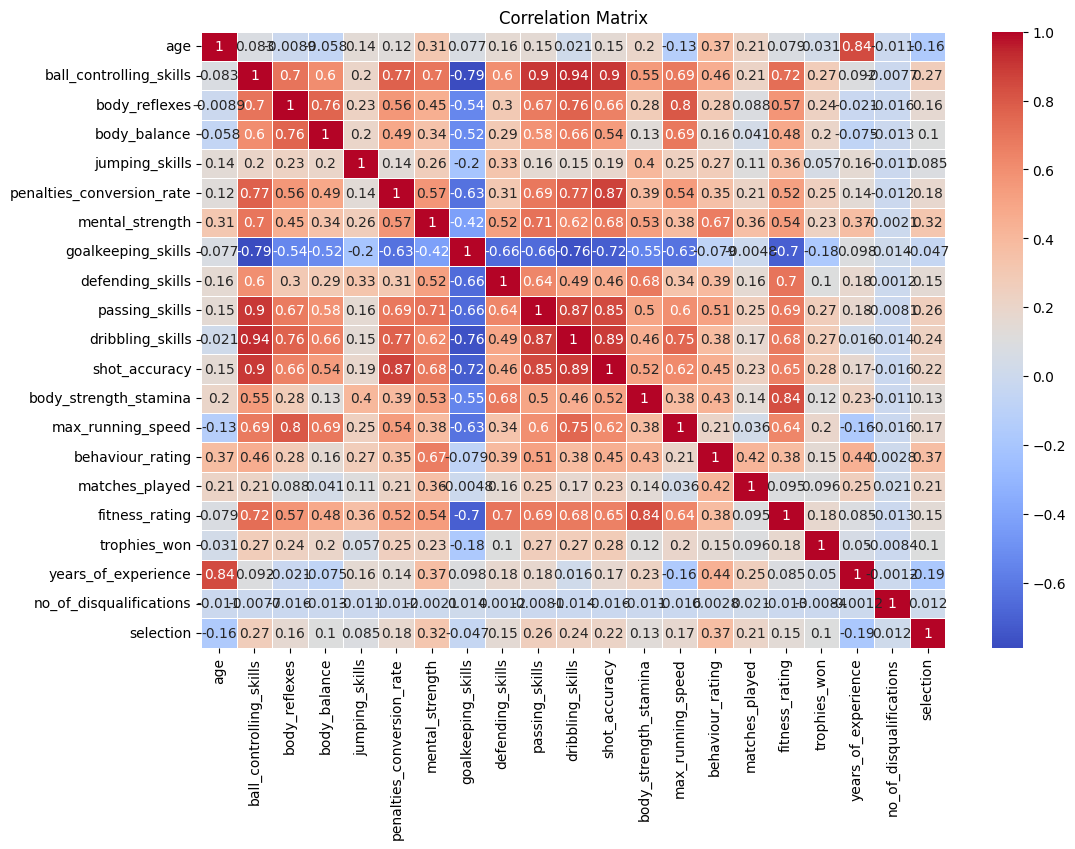

In [288]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing**

In [289]:
#Filling the missing values present in all the columns in the dataset

In [290]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [291]:
# Encode Categorical Variables (Label Encoding)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['strong_foot'] = label_encoder.fit_transform(data['strong_foot'])

In [292]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  int64  
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [294]:
if i == 'weight':
        # Extract numerical part and convert to float
    data[i] = data[i].str.extract('(\d+)').astype(float)

In [295]:
data['coaching'] = pd.to_numeric(data['coaching'], errors='coerce')

In [296]:
for i in ['ball_controlling_skills','jumping_skills','penalties_conversion_rate','mental_strength','shot_accuracy','behaviour_rating','matches_played','fitness_rating','coaching','years_of_experience']:
    data[i] = data[i].fillna(data[i].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [297]:
data['coaching'].unique()

array([nan])

In [299]:
le = LabelEncoder()

In [300]:
data['coaching'] =le.fit_transform(data['coaching'])

In [301]:
data['coaching']

0        0
1        0
2        0
3        0
4        0
        ..
13989    0
13990    0
13991    0
13992    0
13993    0
Name: coaching, Length: 13994, dtype: int64

In [302]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                       417
ball_controlling_skills        0
body_reflexes                  0
body_balance                   0
jumping_skills                 0
penalties_conversion_rate      0
mental_strength                0
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                  0
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating               0
matches_played                 0
fitness_rating                 0
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience            0
no_of_disqualifications        0
selection                      0
dtype: int

In [303]:
data['weight']

0        176lbs
1        148lbs
2        172lbs
3        165lbs
4        158lbs
          ...  
13989    161lbs
13990    165lbs
13991    172lbs
13992    150lbs
13993    159lbs
Name: weight, Length: 13994, dtype: object

In [304]:
# Replace non-numeric characters in the 'weight' column with an empty string
data['weight'] = data['weight'].replace('[^\d.]', '', regex=True)

In [305]:
# Convert the 'weight' column to numeric
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

In [306]:
# Fill missing values with the mean of the 'weight' column
data['weight'] = data['weight'].fillna(data['weight'].mean())

In [307]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [308]:
data.describe()

,age,gender,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,coaching,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,...,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.0,13994.000000,13994.000000,13994.000000
mean,21.135844,0.502358,165.621492,56.190224,61.934329,62.753323,63.612691,48.496784,56.770830,16.474632,...,23.586094,2.313706,5.825983,3.722452,6.425075,3.389095,0.0,6.429684,-4.740675,0.557525
std,5.162719,0.502721,15.218009,16.559018,14.931963,14.203638,11.928480,15.750612,11.965881,16.874551,...,5.194387,1.095877,1.067959,13.282133,1.666258,1.709152,0.0,4.428210,72.023656,0.496698
min,16.000000,0.000000,110.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,...,5.400000,0.000000,2.100000,0.000000,1.000000,0.000000,0.0,1.000000,-999.000000,0.000000
25%,17.000000,0.000000,154.000000,52.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,...,21.100000,1.000000,5.100000,0.000000,5.700000,2.000000,0.0,2.000000,0.000000,0.000000
50%,20.000000,1.000000,165.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,...,24.600000,3.000000,5.900000,0.000000,6.800000,3.000000,0.0,6.000000,0.000000,1.000000
75%,24.000000,1.000000,176.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,...,27.100000,3.000000,6.500000,1.000000,7.500000,5.000000,0.0,10.000000,0.000000,1.000000
max,61.000000,2.000000,243.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,...,35.000000,4.000000,9.800000,151.000000,10.000000,9.000000,0.0,26.000000,25.000000,1.000000


In [309]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

<ipython-input-310-47f070daf609>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


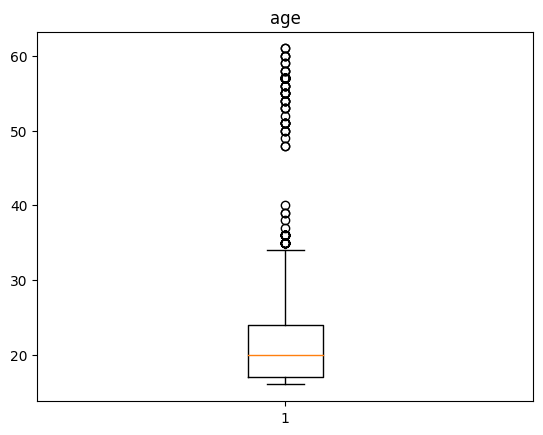

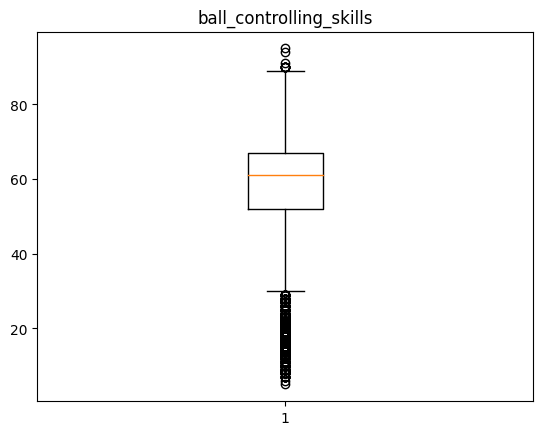

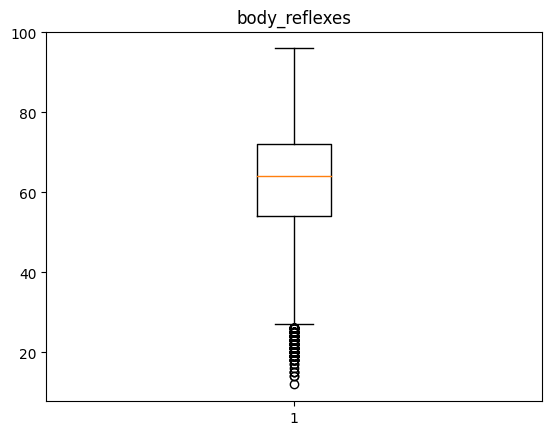

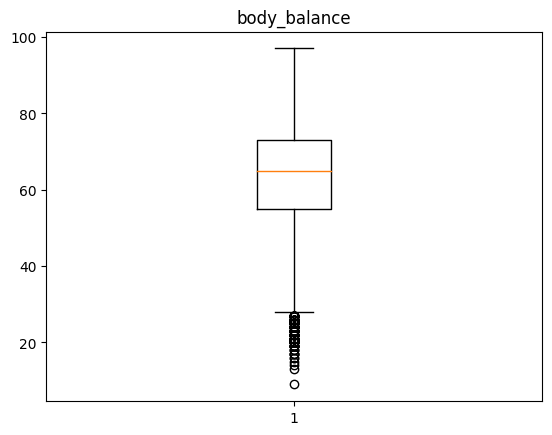

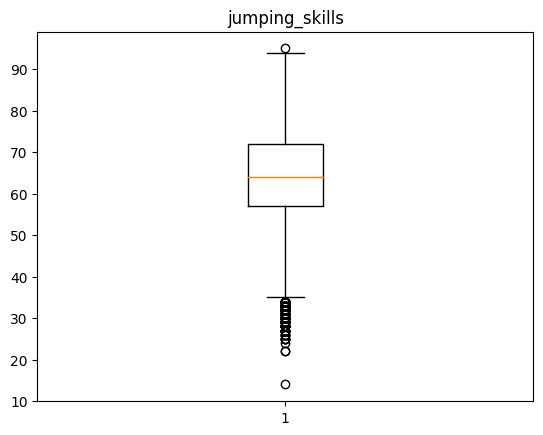

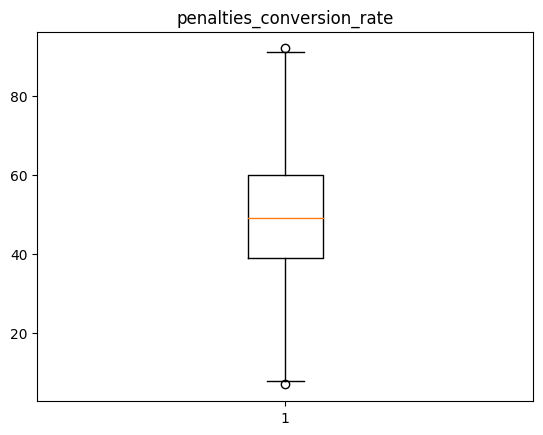

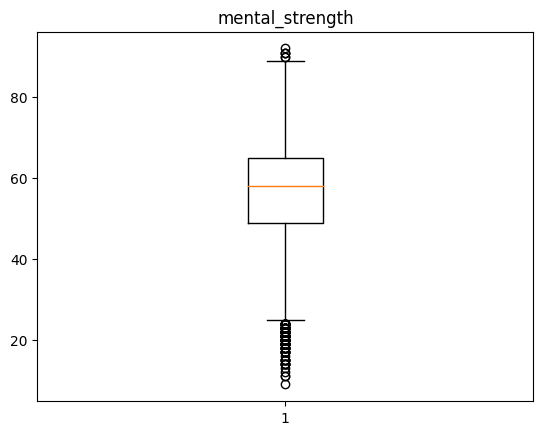

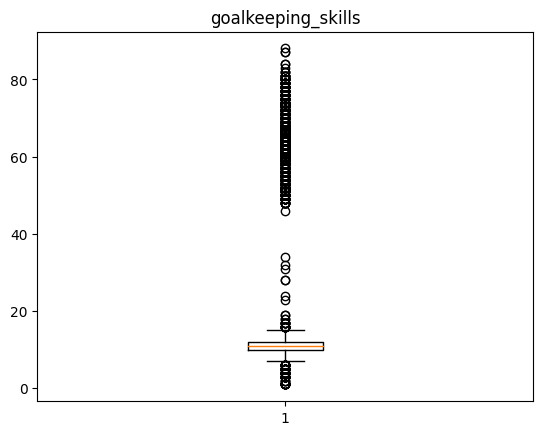

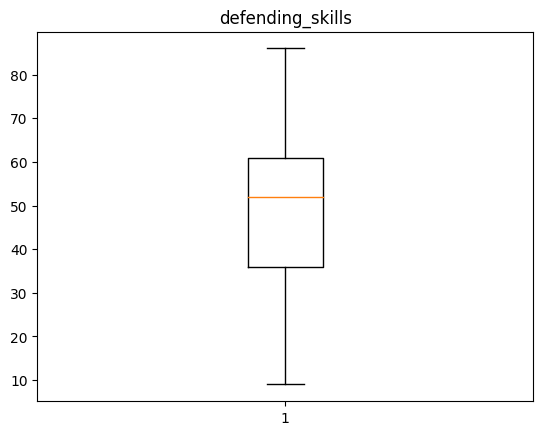

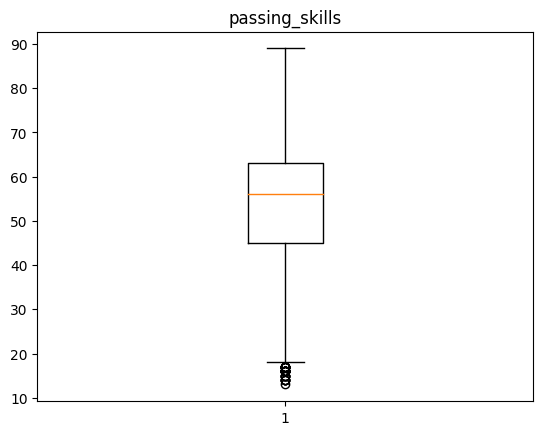

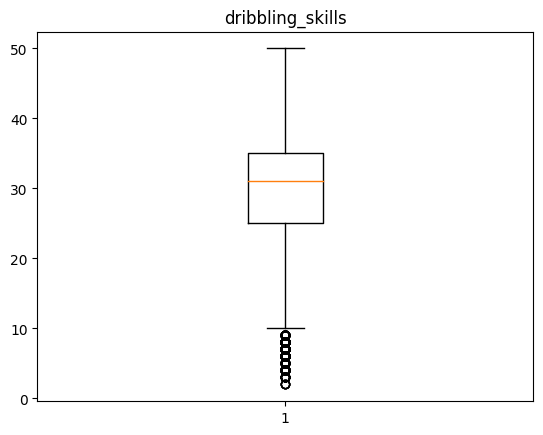

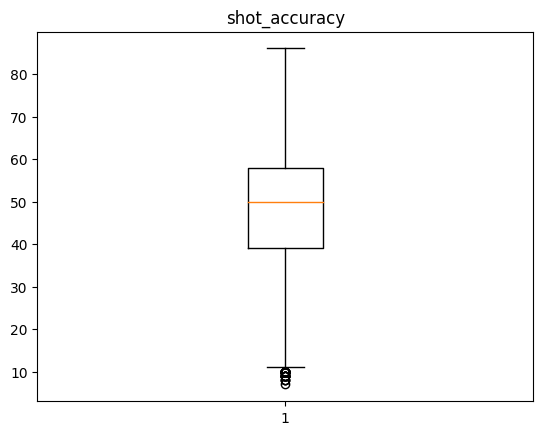

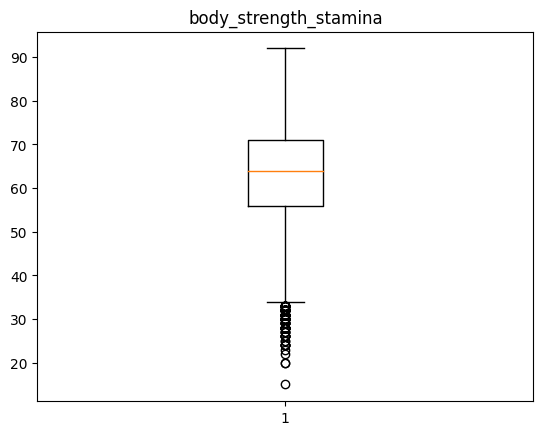

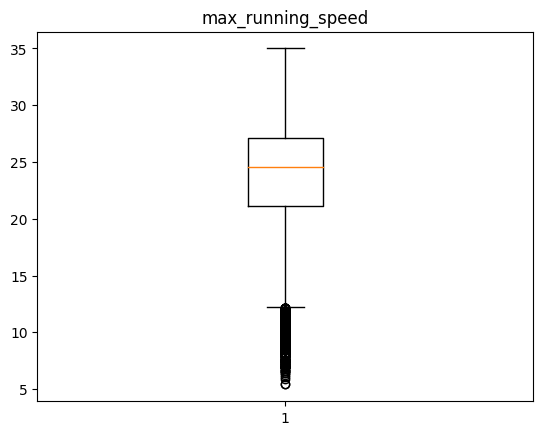

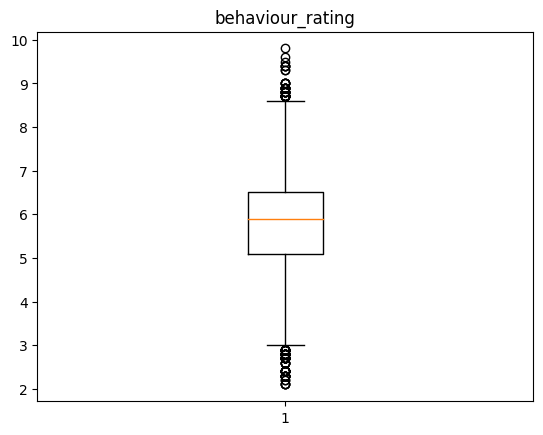

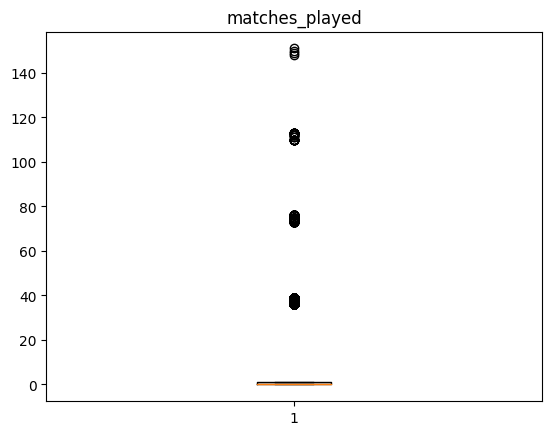

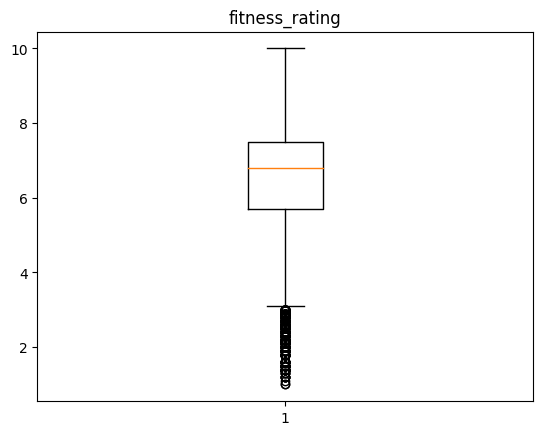

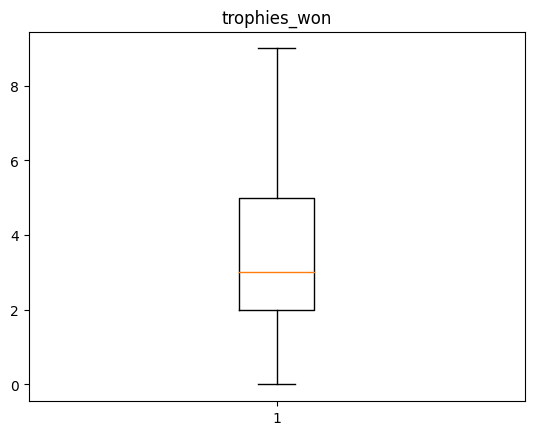

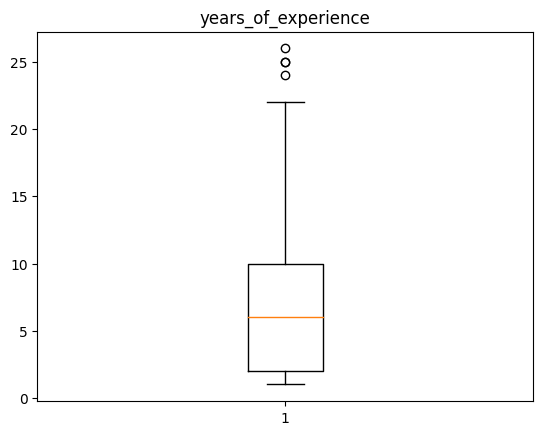

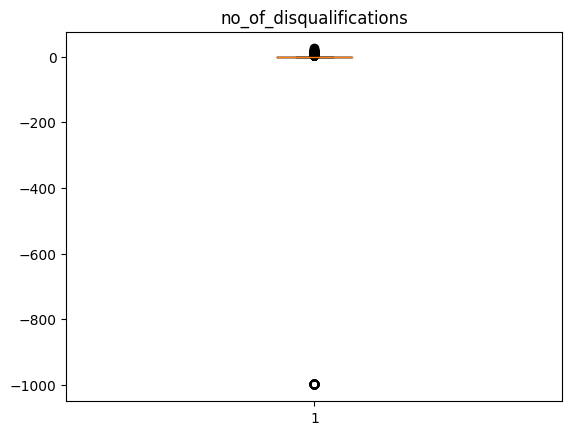

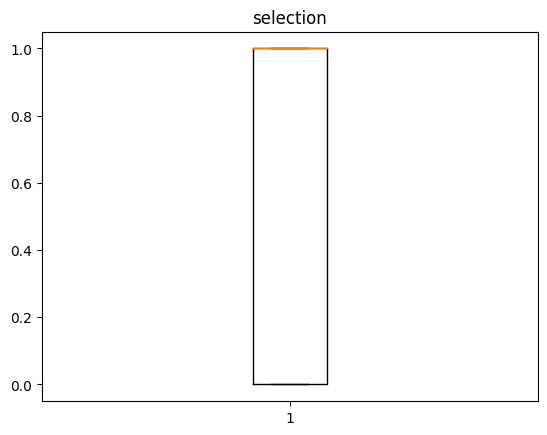

In [310]:
#Outliers detection
for i in num:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i)

In [311]:
Q1=np.percentile(data['years_of_experience'],25,method = 'midpoint')
Q2=np.percentile(data['years_of_experience'],50,method = 'midpoint')
Q3=np.percentile(data['years_of_experience'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

2.0
6.0
10.0


In [312]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is -10.0
max is 22.0


In [313]:
outlier =[]
for x in data['years_of_experience']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [314]:
outlier

[25.0, 25.0, 24.0, 26.0]

In [315]:
Q1=np.percentile(data['goalkeeping_skills'],25,method = 'midpoint')
Q2=np.percentile(data['goalkeeping_skills'],50,method = 'midpoint')
Q3=np.percentile(data['goalkeeping_skills'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

10.0
11.0
12.0


In [316]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is 7.0
max is 15.0


In [317]:
outlier

[25.0, 25.0, 24.0, 26.0]

In [318]:
data.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,1,Ukraine,6'2,176.0,77.0,58.0,47.0,...,3,7.7,0.0,8.1,2.0,High,0,8.0,0.0,1
1,PLID_11234,Herma Tann,18,1,Russia,5'10,148.0,54.0,69.0,70.0,...,0,5.3,0.0,6.8,3.0,Medium,0,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,0,Spain,6'2,172.0,34.0,43.0,45.0,...,1,4.7,0.0,6.6,5.0,Low,0,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,1,Chile,5'11,165.0,79.0,73.0,76.0,...,3,8.6,113.0,8.6,6.0,Medium,0,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,0,Argentina,5'8,158.0,47.0,61.0,74.0,...,3,5.9,0.0,5.7,5.0,Medium,0,4.0,0.0,0


In [319]:
# Specify columns to convert to numeric
numeric_cols = ['age', 'height', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
                'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
                'goalkeeping_skills', 'defending_skills', 'passing_skills',
                'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
                'max_running_speed', 'coaching', 'years_of_experience']

In [320]:
std = preprocessing.StandardScaler()

In [321]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

In [324]:
non_numeric_cols

Index(['player_id', 'name', 'country', 'height', 'dedication_level'], dtype='object')

In [323]:
# the target column
y = data['selection']
X = data.drop(['player_id', 'name','selection'] + non_numeric_cols.tolist(), axis=1)

In [325]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
data = data.drop(['player_id','name'], axis=1)

In [ ]:
data = data.drop(['height'], axis=1)

In [330]:
data.head(5)

,age,gender,country,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,Ukraine,176.0,77.0,58.0,47.0,59.0,41.0,73.0,...,3,7.7,0.0,8.1,2.0,High,0,8.0,0.0,1
1,18,1,Russia,148.0,54.0,69.0,70.0,62.0,53.0,43.0,...,0,5.3,0.0,6.8,3.0,Medium,0,3.0,0.0,0
2,16,0,Spain,172.0,34.0,43.0,45.0,69.0,49.0,45.0,...,1,4.7,0.0,6.6,5.0,Low,0,2.0,0.0,1
3,27,1,Chile,165.0,79.0,73.0,76.0,86.0,81.0,80.0,...,3,8.6,113.0,8.6,6.0,Medium,0,13.0,16.0,1
4,19,0,Argentina,158.0,47.0,61.0,74.0,57.0,49.0,35.0,...,3,5.9,0.0,5.7,5.0,Medium,0,4.0,0.0,0


In [331]:
data.isnull().sum()

age                          0
gender                       0
country                      0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [332]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest classifier**

In [333]:
# Random Forest classifier, Accuracy=85%
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [334]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [335]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.85


In [336]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1286
           1       0.85      0.87      0.86      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.84      0.84      2799
weighted avg       0.85      0.85      0.85      2799



 **LogisticRegression**

In [337]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [338]:
model = lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [339]:
y_predictions=model.predict(X_test)


In [340]:
#checking confusion matrix,TrueNegative will be displayed first
confusion_matrix(y_test,y_predictions)

array([[ 884,  402],
       [ 271, 1242]])

In [341]:
# Logistic Regression , Accuracy = 76%
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions))
print('Recall = ',recall_score(y_test,y_predictions))
print('F1 Score = ',f1_score(y_test,y_predictions))

Accuracy =  0.7595569846373705
Precision =  0.7554744525547445
Recall =  0.82088565763384
F1 Score =  0.7868229331643964


**kNN**

In [342]:
metric_k = []
neighbors=np.arange(3,15)

In [343]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [344]:
metric_k

[0.7309753483386924,
 0.7341907824222936,
 0.7438370846730975,
 0.7581279028224366,
 0.7502679528403001,
 0.7642015005359056,
 0.7588424437299035,
 0.7627724187209718,
 0.7684887459807074,
 0.7695605573419079,
 0.7631296891747053,
 0.7724187209717757]

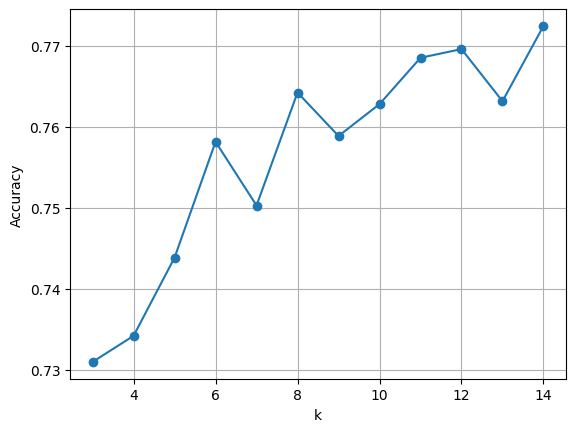

In [345]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [346]:
classifier = KNeighborsClassifier(n_neighbors= 12, metric = 'euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [347]:
#kNN = Accuracy = 76%
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7695605573419079
Precision =  0.7908847184986595
Recall =  0.7799074686054197
F1 Score =  0.7853577371048253


In [349]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(n_splits = 10)

In [351]:
for train_index,test_index in sk.split(X,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 1387  1388  1389 ... 13991 13992 13993]
Test Index [   0    1    2 ... 1411 1412 1413]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [1387 1388 1389 ... 2800 2802 2806]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [2796 2798 2799 ... 4248 4250 4253]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [4171 4172 4173 ... 5626 5629 5631]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [5572 5573 5576 ... 7054 7055 7056]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [6961 6962 6965 ... 8524 8528 8529]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [8302 8303 8304 ... 9892 9893 9895]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [ 9741  9743  9744 ... 11233 11234 11238]
Training Index [    0     1     2 ... 13991 13992 13993]
Test Index [11157 11158 11159 ... 12609 12610 12612]
Training Index [    0     1     2 ... 12609 12610 12

In [357]:
lrmodel=LogisticRegression()
lrmodel =lrmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [358]:
lrmodel =lrmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [359]:
skvc_result = cross_val_score(lrmodel,X,y,cv = sk)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [360]:
np.mean(skvc_result)

0.7554649239252527

In [361]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [362]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

In [363]:
# Define hyperparameters for fine-tuning using GridSearchCV
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]}

In [364]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [365]:
# Get the best parameters
best_params = grid_search.best_params_


In [366]:
# Train the model with the best hyperparameters
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [367]:
# Make predictions
predictions = final_model.predict(X_test)

In [368]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8567345480528761
